In [26]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Aim - remove features but keep accuracy above 90%

In [2]:
y2015 = pd.read_csv(
    'https://www.dropbox.com/s/0so14yudedjmm5m/LoanStats3d.csv?dl=1',
    skipinitialspace=True,
    header=1
)

# Note the warning about dtypes.

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
y2015.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68009401,72868139.0,16000.0,16000.0,16000.0,60 months,14.85%,379.39,C,C5,...,0.0,2.0,78.9,0.0,0.0,2.0,298100.0,31329.0,281300.0,13400.0
1,68354783,73244544.0,9600.0,9600.0,9600.0,36 months,7.49%,298.58,A,A4,...,0.0,2.0,100.0,66.7,0.0,0.0,88635.0,55387.0,12500.0,75635.0
2,68466916,73356753.0,25000.0,25000.0,25000.0,36 months,7.49%,777.55,A,A4,...,0.0,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0
3,68466961,73356799.0,28000.0,28000.0,28000.0,36 months,6.49%,858.05,A,A2,...,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0
4,68495092,73384866.0,8650.0,8650.0,8650.0,36 months,19.89%,320.99,E,E3,...,0.0,12.0,100.0,50.0,1.0,0.0,38998.0,18926.0,2750.0,18248.0


In [4]:
categorical = y2015.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())

id
421097
term
2
int_rate
110
grade
7
sub_grade
35
emp_title
120812
emp_length
11
home_ownership
4
verification_status
3
issue_d
12
loan_status
7
pymnt_plan
1
url
421095
desc
34
purpose
14
title
27
zip_code
914
addr_state
49
earliest_cr_line
668
revol_util
1211
initial_list_status
2
last_pymnt_d
25
next_pymnt_d
4
last_credit_pull_d
26
application_type
2
verification_status_joint
3


In [5]:
# Convert ID and Interest Rate to numeric.
y2015['id'] = pd.to_numeric(y2015['id'], errors='coerce')
y2015['int_rate'] = pd.to_numeric(y2015['int_rate'].str.strip('%'), errors='coerce')

# Drop other columns with many unique variables
y2015.drop(['url', 'emp_title', 'zip_code', 'earliest_cr_line', 'revol_util',
           'sub_grade', 'addr_state', 'desc'], 1, inplace=True)

In [6]:
y2015 = y2015[:-2]

In [7]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
Y = y2015['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

cross_val_score(rfc, X, Y, cv=10)

array([0.97988649, 0.98043267, 0.9813113 , 0.98171499, 0.96112562,
       0.97611019, 0.95573393, 0.98019426, 0.97978958, 0.98028784])

In [14]:
len(y2015.columns) // 10

10

In [17]:
y2015.iloc[1:3, 0:3].corr()

,id,member_id,loan_amnt
id,1.0,1.0,1.0
member_id,1.0,1.0,1.0
loan_amnt,1.0,1.0,1.0


In [48]:
test = X.iloc[:, 0:10]
test['outcome'] = Y
test.iloc[1:5, 0:12]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,outcome
1,68354783.0,73244544.0,9600.0,9600.0,9600.0,7.49,298.58,60000.0,22.44,0.0,Current
2,68466916.0,73356753.0,25000.0,25000.0,25000.0,7.49,777.55,109000.0,26.02,0.0,Fully Paid
3,68466961.0,73356799.0,28000.0,28000.0,28000.0,6.49,858.05,92000.0,21.60,0.0,Current
4,68495092.0,73384866.0,8650.0,8650.0,8650.0,19.89,320.99,55000.0,25.49,0.0,Fully Paid


In [68]:
list(X.columns)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'pub_rec_bankruptcies',
 'tax_liens',
 'tot_hi_cred_lim',
 't

In [74]:
def corr_maps(n_cols, variables):
    n_graphs = (len(variables.columns) // n_cols) 
    for n in np.arange(0, n_graphs-1):
        data = variables.iloc[:, (n*n_cols) : (n+1)*n_cols]
        corrmat = data.corr()
        sns.heatmap(corrmat, cmap='PRGn', center=0)
        plt.show()
    data = variables.iloc[:, ((n_graphs-1)*n_cols): ]
    corrmat = data.corr()
    sns.heatmap(corrmat, cmap='PRGn', center=0)
    plt.show()
        

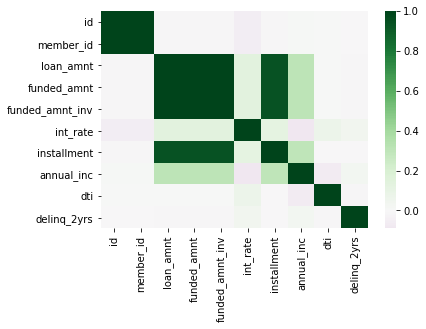

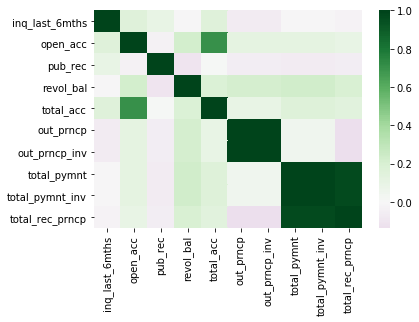

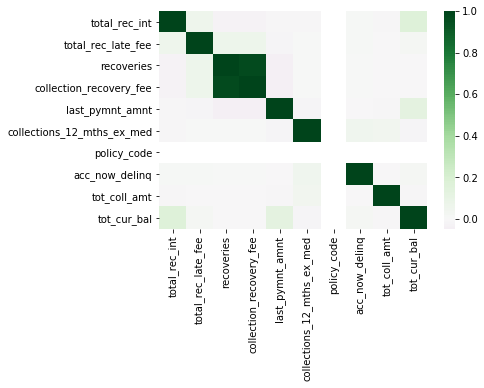

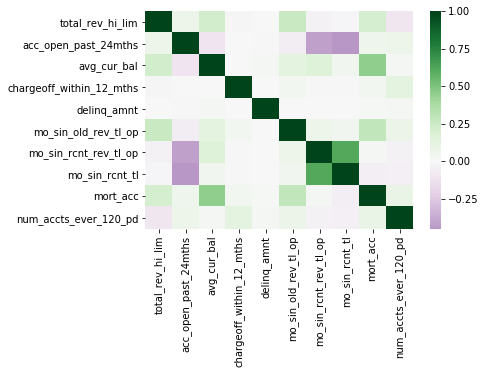

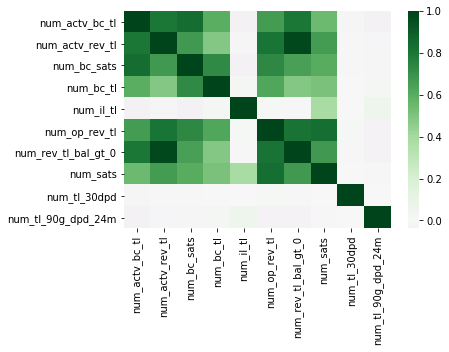

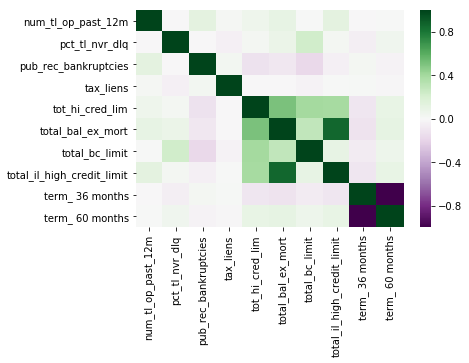

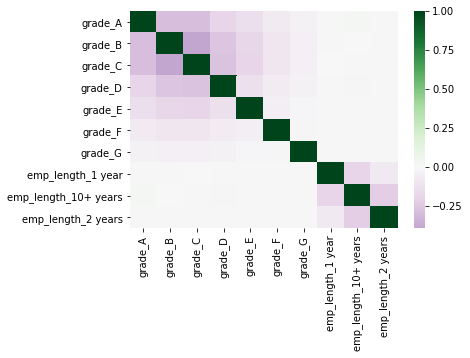

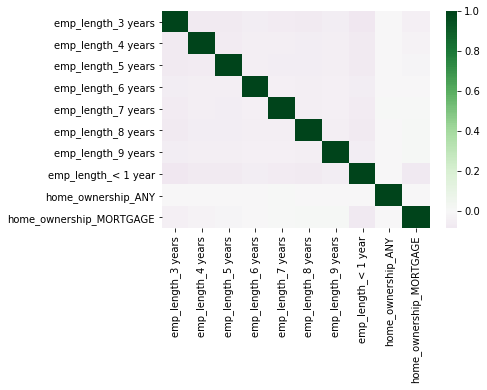

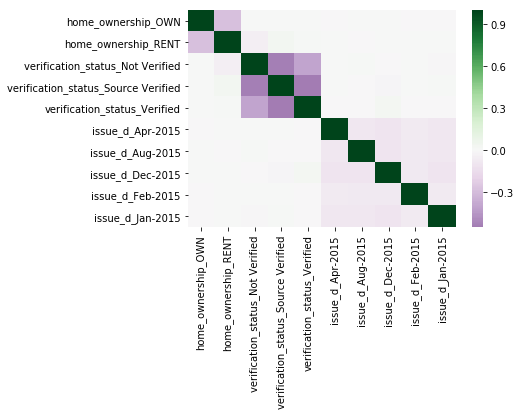

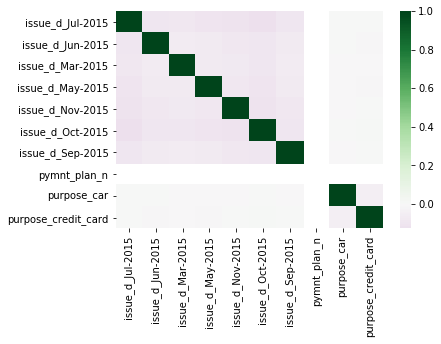

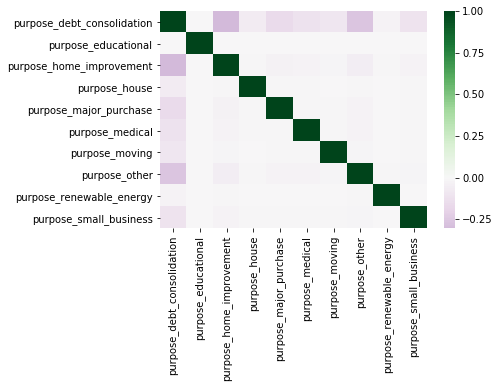

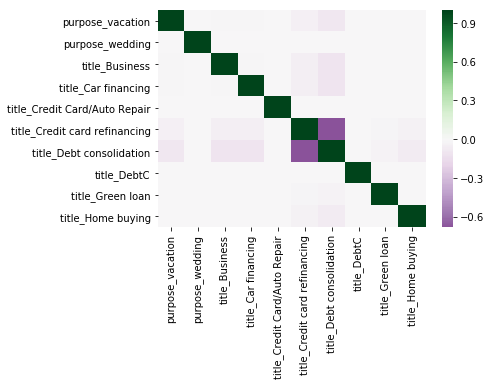

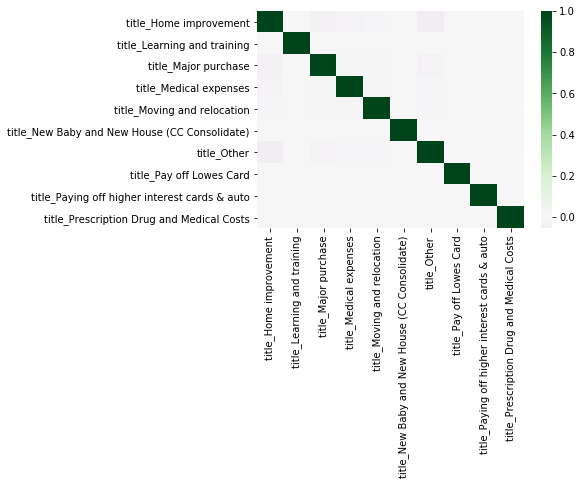

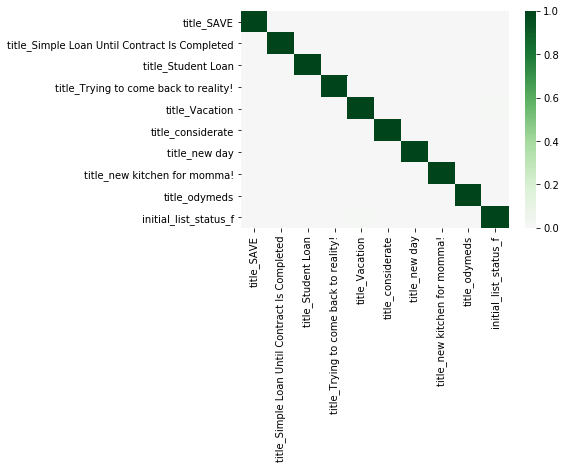

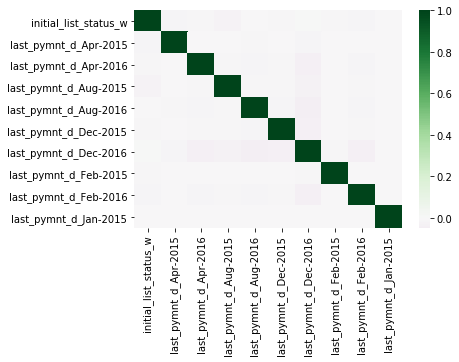

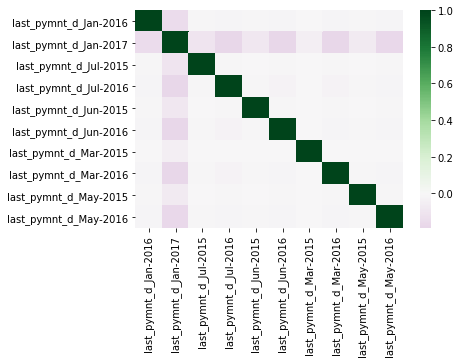

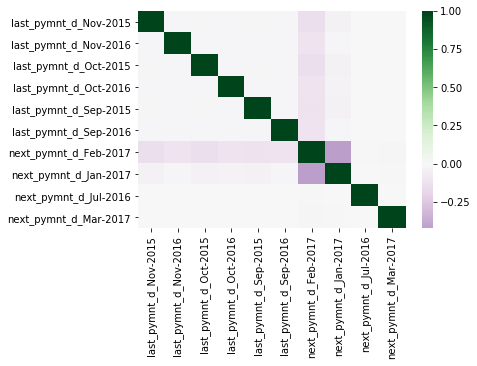

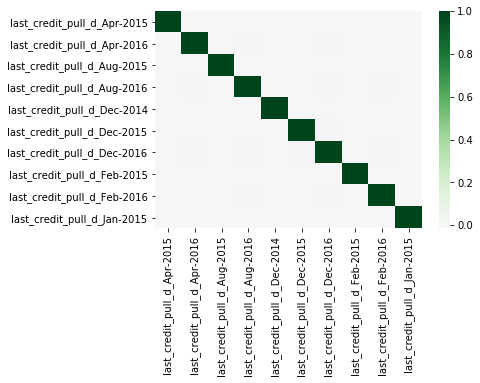

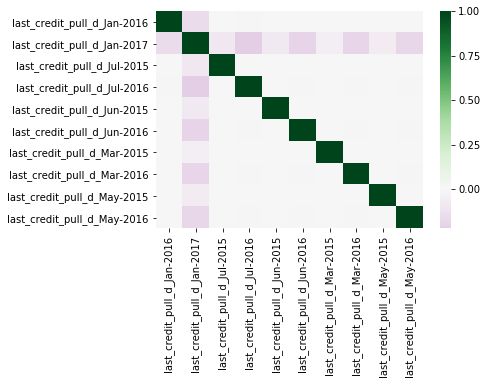

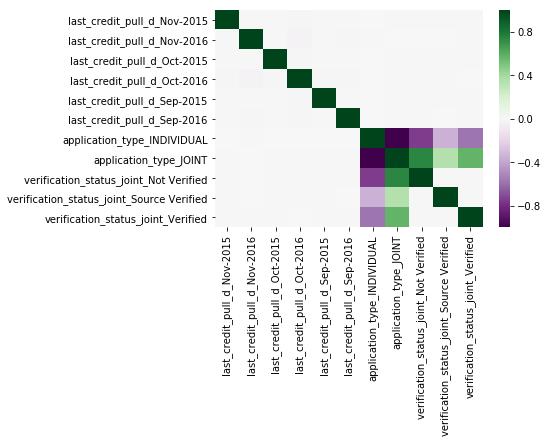

In [75]:
corr_maps(10, X)

In [69]:
correlated_variables = []

correlated_variables.extend(['id', 'member_id', ## Remove ID and member_id
                            'funded_amnt', 'funded_amnt_inv', 'installment', ## All strongly correlated with loan_amnt
                             'out_prncp_inv', ## Strongly correlated with out_prncp
                             'total_pymnt_inv', 'total_rec_prncp', ## All strongly correlated with total_pymnt
                             'collection_recovery_fee', ## Strongly correlated with recoveries
                             'mo_sin_rcnt_tl', ## Correlated with mo_sin_rcnt_rev_tl_op
                             'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_op_rev_tl', 'num_rev_tl_bal_gt_0', 'num_sats', ## All correlated with num_actv_bc_tl
                             'total_il_high_credit_limit', ## Correlated with total_bal_ex_mort
                             'term_ 60 months', ## Correlated with term_36months
                             'title_Debt consolidation', ## Correlated with title_Credit card refinancing
                             'application_type_JOINT', 'verification_status_joint_Not Verified', 'verification_status_joint_Verified']) ## Correlated with application_type_individual
                             
correlated_variables

['id',
 'member_id',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt_inv',
 'total_rec_prncp',
 'collection_recovery_fee',
 'mo_sin_rcnt_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_op_rev_tl',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'total_il_high_credit_limit',
 'term_ 60 months',
 'title_Debt consolidation',
 'application_type_JOINT',
 'verification_status_joint_Not Verified',
 'verification_status_joint_Verified']

In [70]:
rfc_2 = ensemble.RandomForestClassifier()
X_2 = X.drop(correlated_variables, 1)
Y = y2015['loan_status']

rfc_2_scores = cross_val_score(rfc_2, X_2, Y, cv=10)

In [71]:
rfc_2_scores

array([0.98021895, 0.9780105 , 0.98000522, 0.98021895, 0.9742579 ,
       0.97489907, 0.96228835, 0.97941058, 0.97853089, 0.97774664])

In [73]:
len(X_2.columns)

179

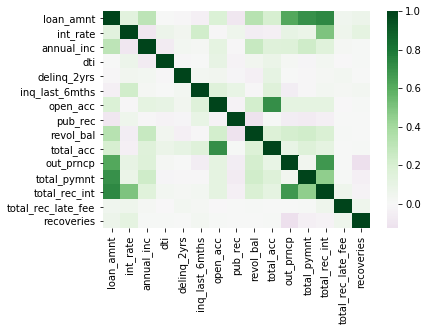

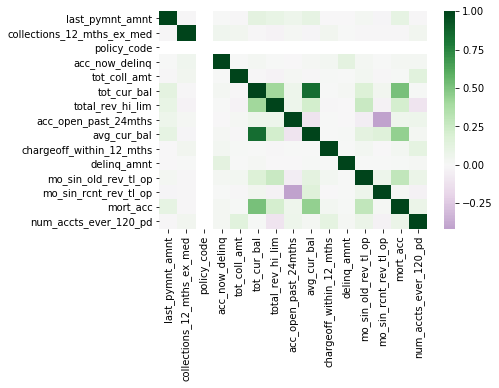

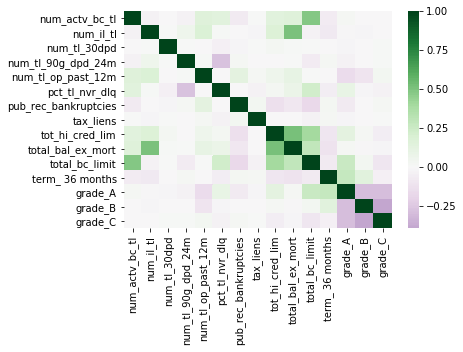

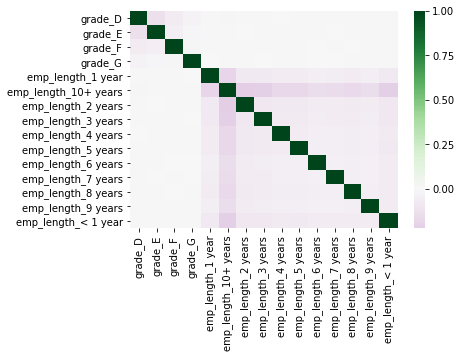

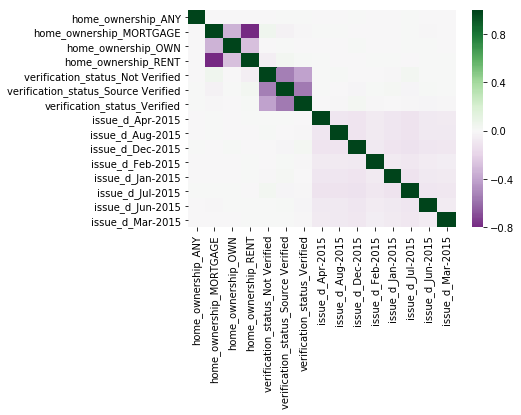

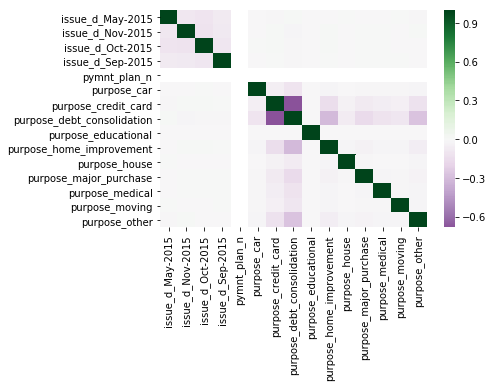

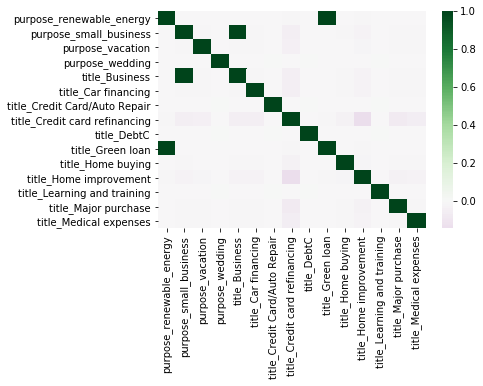

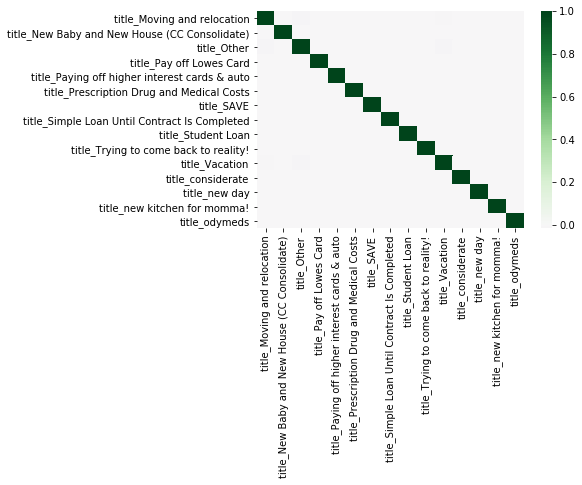

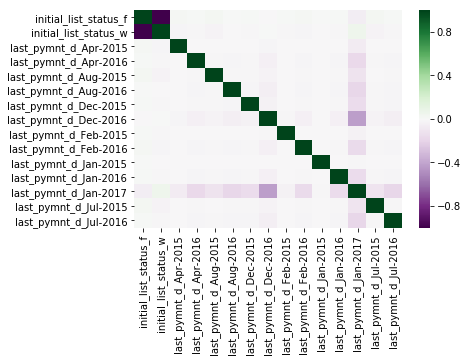

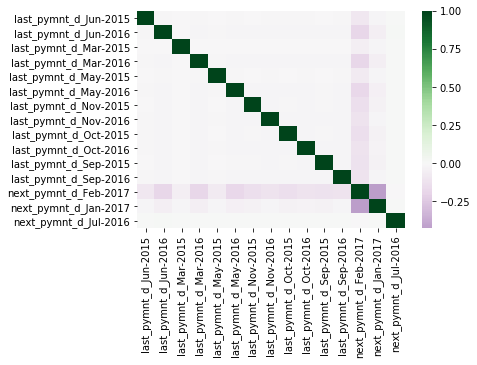

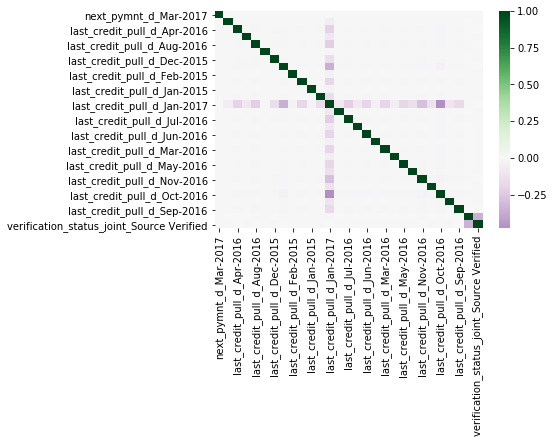

In [77]:
corr_maps(15, X_2)

In [78]:
## Remove more correlated variables

correlated_variables_2 = []

correlated_variables_2.extend(['out_prncp', 'total_pymnt', 'total_rec_int', ## correlated with loan_amnt
                              'open_acc', ## correlated with total_acc
                               'avg_cur_bal', 'mort_acc', ## correlated with tot_cur_bal
                               'mo_sin_rcnt_rev_tl_op', ## correlated with acc_open_past_24mths
                               'total_bc_limit', ## correlated with num_actv_bc_tl
                               'total_bal_ex_mort', ## correlated with num_il_tl
                               'home_ownership_RENT', 'home_ownership_OWN', ## correlated with home_ownership_MORTGAGE
                               'verification_status_Source Verified', 'verification_status_Verified' ## correlated with verification_status_Not Verified                             
                              ])

In [79]:
X_3 = X_2.drop(correlated_variables_2, axis=1)

In [80]:
rfc_3 = ensemble.RandomForestClassifier()
rfc_3_scores = cross_val_score(rfc_3, X_3, Y, cv=10)

In [82]:
rfc_3_scores

array([0.97254874, 0.97012657, 0.9739498 , 0.97311866, 0.96563762,
       0.96616006, 0.95931986, 0.97230996, 0.97266488, 0.97278298])

In [83]:
## I think purpose and title are very similar so will remove all titles

X_4 = X_3[X_3.columns.drop(list(X_3.filter(regex='title_')))]

In [84]:
rfc_4 = ensemble.RandomForestClassifier()
rfc_4_scores = cross_val_score(rfc_4, X_4, Y, cv=10)

In [85]:
rfc_4_scores

array([0.97226378, 0.96107905, 0.97335613, 0.97535086, 0.96456899,
       0.96689622, 0.95689758, 0.97371108, 0.969815  , 0.97354296])

In [88]:
len(X_4.columns)

140

In [89]:
## Last payment and last credit pull also seem pretty useless

X_5 = X_4[X_4.columns.drop(list(X_4.filter(regex='last_pymnt_d')))]
X_5 = X_5[X_5.columns.drop(list(X_5.filter(regex='last_credit_pull_d')))]

In [91]:
len(X_5.columns)

89

In [92]:
rfc_5 = ensemble.RandomForestClassifier()
rfc_5_scores = cross_val_score(rfc_5, X_5, Y, cv=10)

In [93]:
rfc_5_scores

array([0.93735604, 0.92427157, 0.93690485, 0.94561991, 0.93334125,
       0.93832819, 0.90954428, 0.93913415, 0.93499893, 0.90497791])

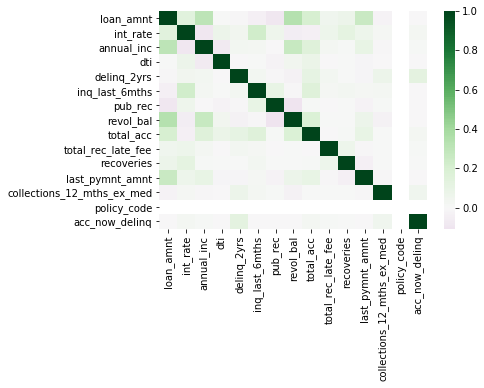

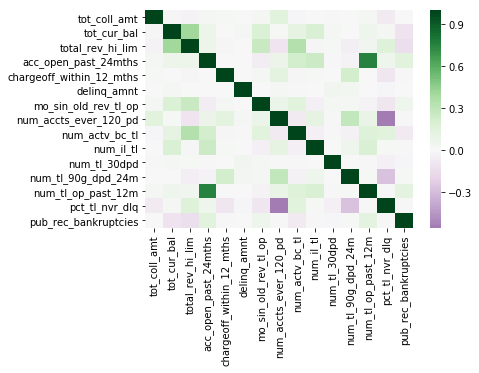

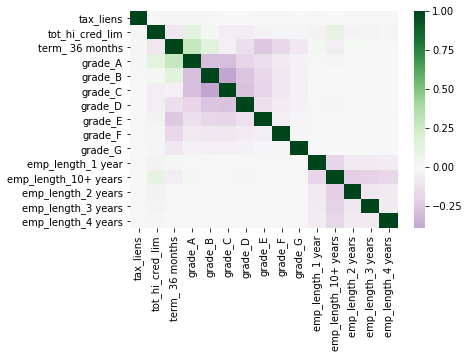

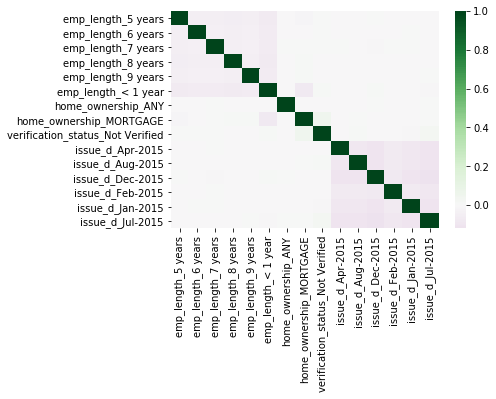

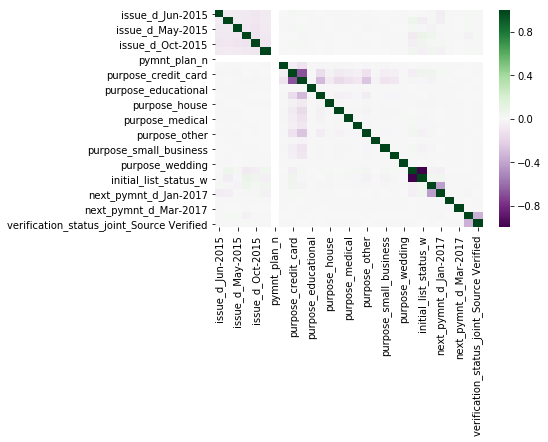

In [94]:
corr_maps(15, X_5)

In [95]:
## Remove issue dates

X_6 = X_5[X_5.columns.drop(list(X_5.filter(regex='issue_d')))]

In [96]:
rfc_6 = ensemble.RandomForestClassifier()
rfc_6_scores = cross_val_score(rfc_6, X_6, Y, cv=10)

In [97]:
rfc_6_scores

array([0.94728218, 0.95027428, 0.94944314, 0.95051174, 0.95024935,
       0.94941819, 0.95008193, 0.94844333, 0.94836963, 0.94798841])

In [98]:
## Remove employment length

X_7 = X_6[X_6.columns.drop(list(X_6.filter(regex='emp_length')))]

In [100]:
rfc_7 = ensemble.RandomForestClassifier()
rfc_7_scores = cross_val_score(rfc_7, X_7, Y, cv=10)

In [101]:
rfc_7_scores

array([0.94951438, 0.9508442 , 0.94939564, 0.95124789, 0.95165044,
       0.95015436, 0.95153055, 0.95069938, 0.94965208, 0.95003087])

In [102]:
len(X_7.columns)

66

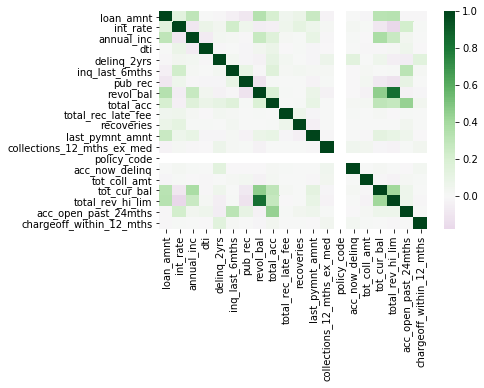

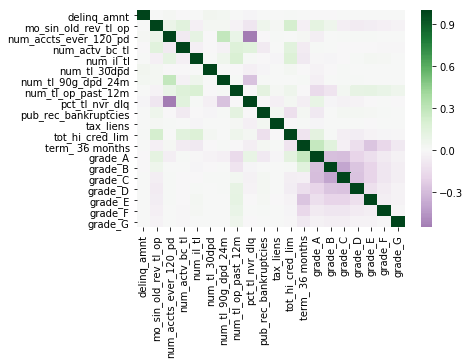

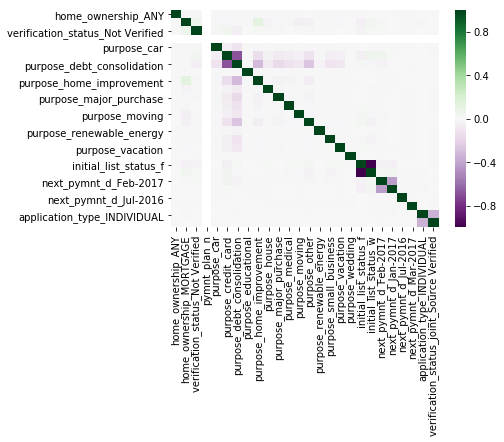

In [104]:
corr_maps(20, X_7)

In [105]:
## Remove all purposes

X_8 = X_7[X_7.columns.drop(list(X_7.filter(regex='purpose_')))]

In [106]:
len(X_8.columns)

52

In [107]:
rfc_8 = ensemble.RandomForestClassifier()
rfc_8_scores = cross_val_score(rfc_8, X_8, Y, cv=10)

In [108]:
rfc_8_scores

array([0.95115291, 0.95179407, 0.95017929, 0.95146161, 0.95241035,
       0.95119924, 0.95198176, 0.9510081 , 0.95017456, 0.95010212])

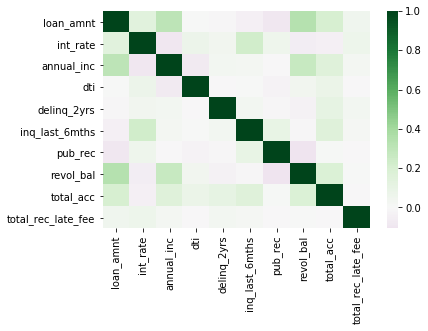

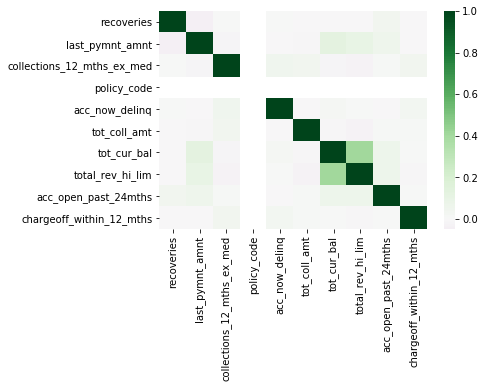

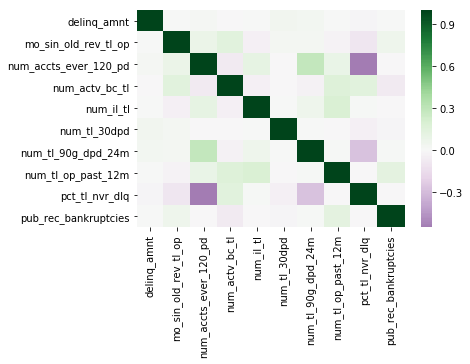

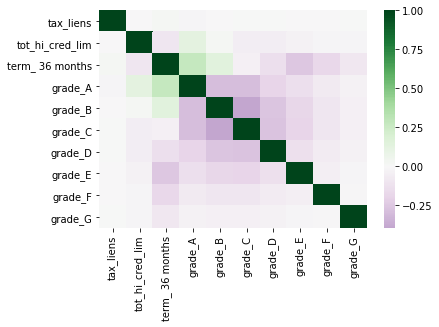

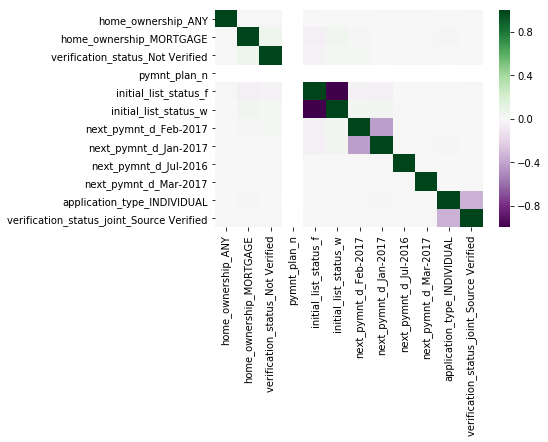

In [110]:
corr_maps(10, X_8)

In [111]:
## Remove all grades as correlated to term_36 months

X_9 = X_8[X_8.columns.drop(list(X_8.filter(regex='grade_')))]

In [112]:
rfc_9 = ensemble.RandomForestClassifier()
rfc_9_scores = cross_val_score(rfc_9, X_9, Y, cv=10)

In [113]:
rfc_9_scores

array([0.94918192, 0.95139037, 0.9500843 , 0.95167533, 0.95148421,
       0.95100926, 0.95136432, 0.95122183, 0.95064954, 0.95026837])

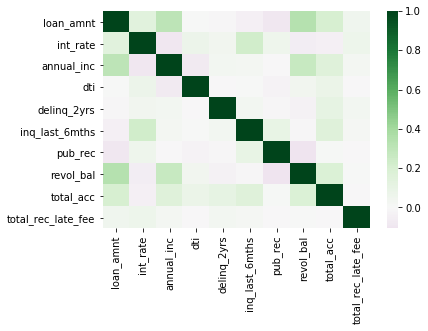

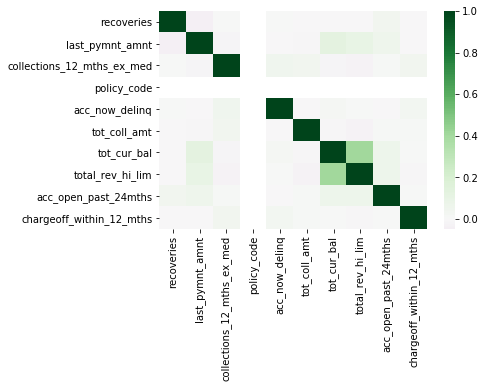

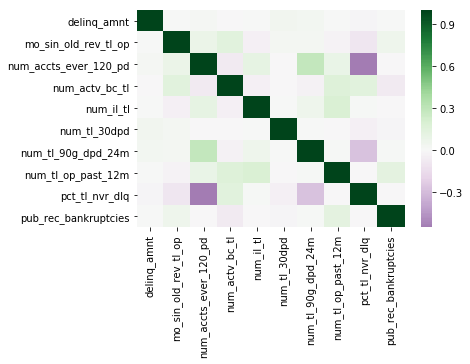

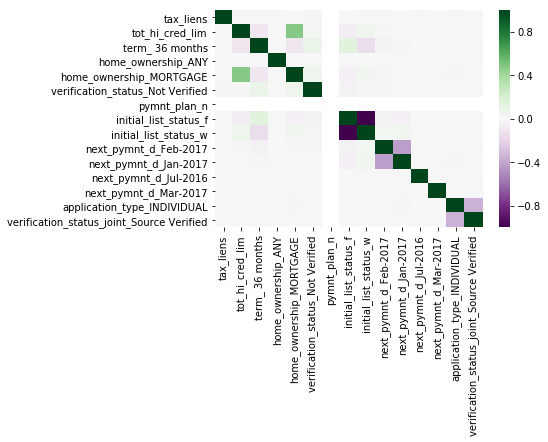

In [114]:
corr_maps(10, X_9)

In [117]:
## Remove more correlations

correlated_variables_3 = []
correlated_variables_3.extend(['annual_inc', 'inq_last_6mths', 'revol_bal',
                              'total_acc', 'tot_cur_bal', 'num_tl_90g_dpd_24m',
                               'pct_tl_nvr_dlq', 'tot_hi_cred_lim', 
                               'initial_list_status_w', 'next_pymnt_d_Feb-2017',
                               'verification_status_joint_Source Verified'
                              ])

In [118]:
X_10 = X_9.drop(correlated_variables_3, axis=1)

In [119]:
rfc_10 = ensemble.RandomForestClassifier()
rfc_10_scores = cross_val_score(rfc_10, X_10, Y, cv=10)

In [120]:
rfc_10_scores

array([0.89584669, 0.89784142, 0.89765144, 0.90242454, 0.90522441,
       0.90541439, 0.90645705, 0.90728823, 0.90766381, 0.90445542])

In [121]:
rfc_10_scores.mean()

0.9030267413780461

In [122]:
## Remove more correlations v2

correlated_variables_3_a = []
correlated_variables_3_a.extend(['annual_inc', 'inq_last_6mths', 'revol_bal',
                              'total_acc', 'total_rev_hi_lim', 'num_tl_90g_dpd_24m',
                               'pct_tl_nvr_dlq', 'tot_hi_cred_lim', 
                               'initial_list_status_w', 'next_pymnt_d_Feb-2017',
                               'verification_status_joint_Source Verified'
                              ])

In [123]:
X_10_a = X_9.drop(correlated_variables_3_a, axis=1)

In [124]:
rfc_10_a = ensemble.RandomForestClassifier()
rfc_10_a_scores = cross_val_score(rfc_10_a, X_10_a, Y, cv=10)

In [125]:
rfc_10_a_scores

array([0.89636912, 0.8983401 , 0.89788891, 0.90237705, 0.90553313,
       0.90498694, 0.90579211, 0.90659954, 0.90650011, 0.90502541])

In [126]:
rfc_10_a_scores.mean()

0.9029412420290536

In [128]:
X_test = pd.concat([X_9, Y], axis=1)
X_test.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,total_rec_late_fee,...,pymnt_plan_n,initial_list_status_f,initial_list_status_w,next_pymnt_d_Feb-2017,next_pymnt_d_Jan-2017,next_pymnt_d_Jul-2016,next_pymnt_d_Mar-2017,application_type_INDIVIDUAL,verification_status_joint_Source Verified,loan_status
0,16000.0,14.85,48000.0,33.18,0.0,0.0,2.0,19108.0,19.0,0.0,...,1,0,1,0,1,0,0,1,0,Current
1,9600.0,7.49,60000.0,22.44,0.0,0.0,0.0,7722.0,9.0,0.0,...,1,0,1,0,1,0,0,1,0,Current
2,25000.0,7.49,109000.0,26.02,0.0,1.0,0.0,20862.0,19.0,0.0,...,1,0,1,0,0,0,0,1,0,Fully Paid
3,28000.0,6.49,92000.0,21.60,0.0,0.0,0.0,51507.0,24.0,0.0,...,1,0,1,0,1,0,0,1,0,Current
4,8650.0,19.89,55000.0,25.49,0.0,4.0,1.0,9568.0,19.0,0.0,...,1,0,1,0,0,0,0,1,0,Fully Paid


In [139]:
def corr_maps_y(n_cols, variables, outcome):
    n_graphs = (len(variables.columns) // n_cols) 
    for n in np.arange(0, n_graphs-1):
        data = variables.iloc[:, (n*n_cols) : (n+1)*n_cols]
        data = pd.concat([data, outcome], axis=1)
        data = pd.get_dummies(data)
        corrmat = data.corr()
        sns.heatmap(corrmat, cmap='PRGn', center=0)
        plt.show()
    data = variables.iloc[:, ((n_graphs-1)*n_cols): ]
    data = pd.concat([data, outcome], axis=1)
    data = pd.get_dummies(data)
    corrmat = data.corr()
    sns.heatmap(corrmat, cmap='PRGn', center=0)
    plt.show()
        

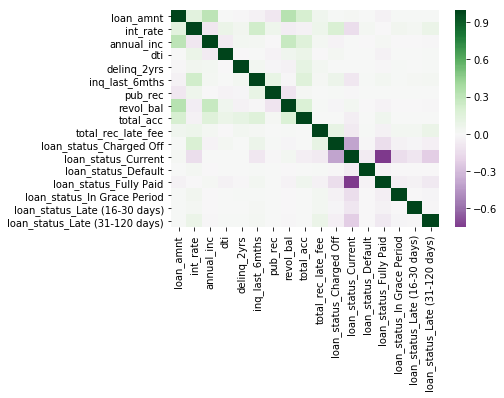

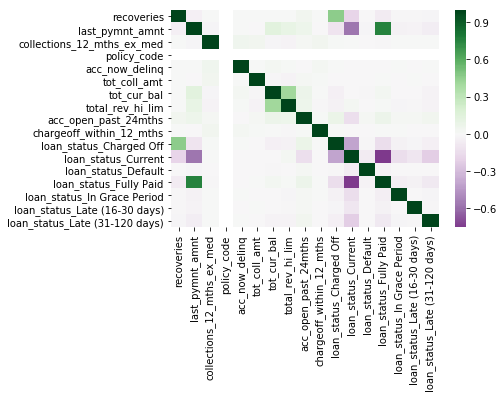

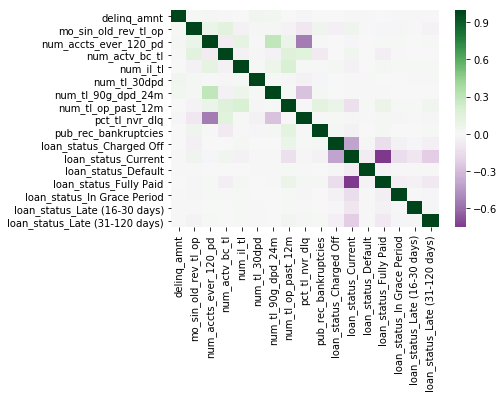

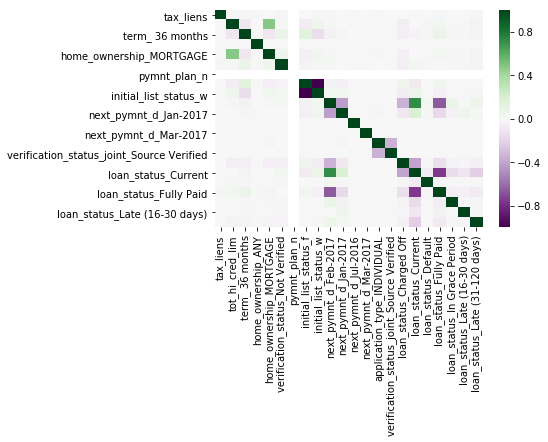

In [140]:
corr_maps_y(10, X_9, Y)

In [141]:
## Uncorrelated with outcome

uncorr_out_variables = []
uncorr_out_variables.extend(['annual_inc', 'delinq_2yrs', 'pub_rec',
                            'collections_12_mths_ex_med', 'policy_code',
                            'acc_now_delinq', 'tot_coll_amt',
                            'chargeoff_within_12_mths', 'delinq_amnt',
                            'num_accts_ever_120_pd', 'num_tl_30dpd', 
                            'num_tl_90g_dpd_24m', 'pct_tl_nvr_dlq', 
                            'pub_rec_bankruptcies', 'tax_liens',
                            'home_ownership_ANY', 'pymnt_plan_n', 
                            'next_pymnt_d_Jul-2016', 'next_pymnt_d_Mar-2017',
                            'application_type_INDIVIDUAL', 'verification_status_joint_Source Verified'])

In [142]:
X_10_b = X_9.drop(uncorr_out_variables, axis=1)

In [143]:
rfc_10_b = ensemble.RandomForestClassifier()

rfc_10_b_scores = cross_val_score(rfc_10_b, X_10_b, Y, cv=10)

In [144]:
rfc_10_b_scores

array([0.95177032, 0.9523165 , 0.95124789, 0.95236399, 0.95260033,
       0.9520304 , 0.95297917, 0.95290793, 0.95093452, 0.95067211])

In [145]:
len(X_10_b.columns)

24

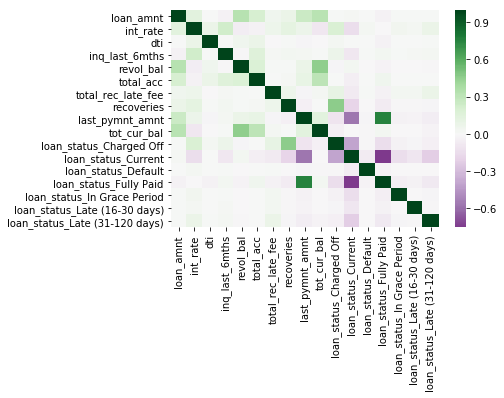

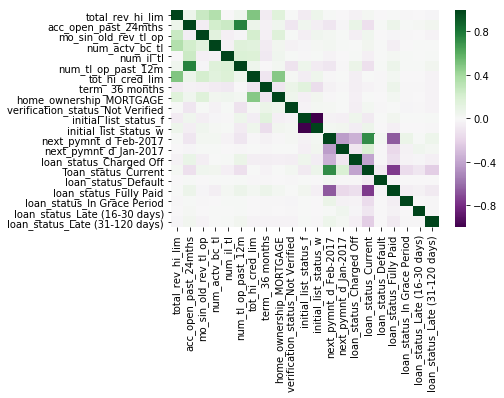

In [147]:
corr_maps_y(10, X_10_b, Y)

In [149]:
## remove more uncorrelated with outcome and correlated with each other

removals = ['loan_amnt', 'dti', 'tot_cur_bal', 'total_rev_hi_lim', 
           'acc_open_past_24mths', 'tot_hi_cred_lim', 'initial_list_status_w']

In [150]:
X_11 = X_10_b.drop(removals, axis=1)

In [151]:
rfc_11 = ensemble.RandomForestClassifier()
rfc_11_scores = cross_val_score(rfc_11, X_11, Y, cv=10)

In [152]:
rfc_11_scores

array([0.94892071, 0.94968061, 0.94996557, 0.95112916, 0.95084303,
       0.95024935, 0.95103185, 0.95039065, 0.94941459, 0.94905714])

In [153]:
len(X_11.columns)

17

In [158]:
X_11.columns

Index(['int_rate', 'inq_last_6mths', 'revol_bal', 'total_acc',
       'total_rec_late_fee', 'recoveries', 'last_pymnt_amnt',
       'mo_sin_old_rev_tl_op', 'num_actv_bc_tl', 'num_il_tl',
       'num_tl_op_past_12m', 'term_ 36 months', 'home_ownership_MORTGAGE',
       'verification_status_Not Verified', 'initial_list_status_f',
       'next_pymnt_d_Feb-2017', 'next_pymnt_d_Jan-2017'],
      dtype='object')

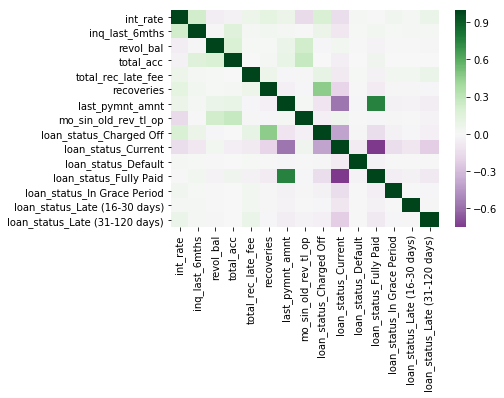

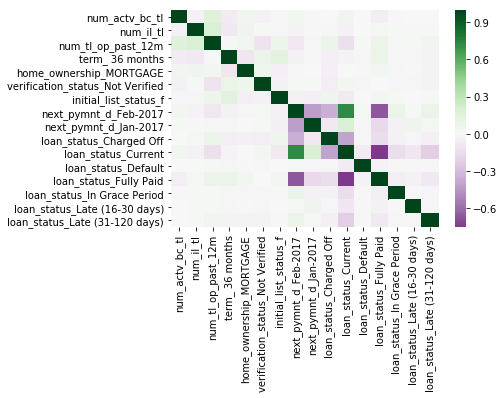

In [155]:
corr_maps_y(8, X_11, Y)

In [157]:
removals_2 = ['revol_bal', 'mo_sin_old_rev_tl_op', 'num_il_tl', 
             'next_pymnt_d_Jan-2017']

X_12 = X_11.drop(removals_2, axis=1)

rfc_12 = ensemble.RandomForestClassifier()
rfc_12_scores = cross_val_score(rfc_12, X_12, Y, cv=10)

In [160]:
rfc_12_scores.mean()

0.9010652544621355

In [161]:
rfc_12_scores

array([0.88601553, 0.90085726, 0.89247465, 0.91140082, 0.89802897,
       0.89897886, 0.90807191, 0.89498682, 0.91300734, 0.90683038])

In [162]:
rfc_12.fit(X_12, Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [163]:
rfc_12.feature_importances_

array([0.05942978, 0.0139255 , 0.0674457 , 0.00836264, 0.05998439,
       0.55736377, 0.03703349, 0.02218845, 0.00418675, 0.00401834,
       0.00465466, 0.00494851, 0.15645802])

In [164]:
X_12.columns

Index(['int_rate', 'inq_last_6mths', 'total_acc', 'total_rec_late_fee',
       'recoveries', 'last_pymnt_amnt', 'num_actv_bc_tl', 'num_tl_op_past_12m',
       'term_ 36 months', 'home_ownership_MORTGAGE',
       'verification_status_Not Verified', 'initial_list_status_f',
       'next_pymnt_d_Feb-2017'],
      dtype='object')

In [165]:
feature_importances = pd.DataFrame(rfc_12.feature_importances_,
                                   index = X_12.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [166]:
feature_importances

,importance
last_pymnt_amnt,0.557364
next_pymnt_d_Feb-2017,0.156458
total_acc,0.067446
recoveries,0.059984
int_rate,0.059430
num_actv_bc_tl,0.037033
num_tl_op_past_12m,0.022188
inq_last_6mths,0.013926
total_rec_late_fee,0.008363
initial_list_status_f,0.004949


In [168]:
removals_3 = ['home_ownership_MORTGAGE', 'term_ 36 months',
              'verification_status_Not Verified', 'initial_list_status_f']

X_13 = X_12.drop(removals_3, axis=1)

rfc_13 = ensemble.RandomForestClassifier()

rfc_13_scores = cross_val_score(rfc_13, X_13, Y, cv=10)

In [169]:
rfc_13_scores.mean()

0.8970542488535175